# Installing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Dataset

In [3]:
data=pd.read_csv("C:/Users/91983/Desktop/who_suicide_statistics.csv")
data=data.sort_values(['year'],ascending=True)
print(data.shape)
data.head()

(43776, 6)


,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


# Data Visualization

C:\Users\91983\AppData\Local\Temp\ipykernel_15688\2776206235.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),


<AxesSubplot:>

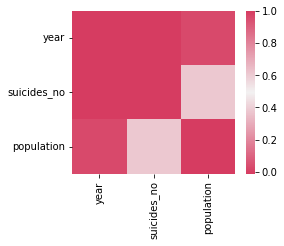

In [4]:
f,ax=plt.subplots(figsize=(4,3))
corr=data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(3,3,as_cmap=True),square=True,ax=ax)

In [8]:
#renamng the columns
data.rename({'sex':'gender','suicides_no':'suicides'},inplace=True,axis=1)
data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 6204 to 25858
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     43776 non-null  object 
 1   year        43776 non-null  int64  
 2   gender      43776 non-null  object 
 3   age         43776 non-null  object 
 4   suicides    41520 non-null  float64
 5   population  38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
data.describe()

,year,suicides,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [11]:
data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [12]:
data['country'].value_counts().count()

141

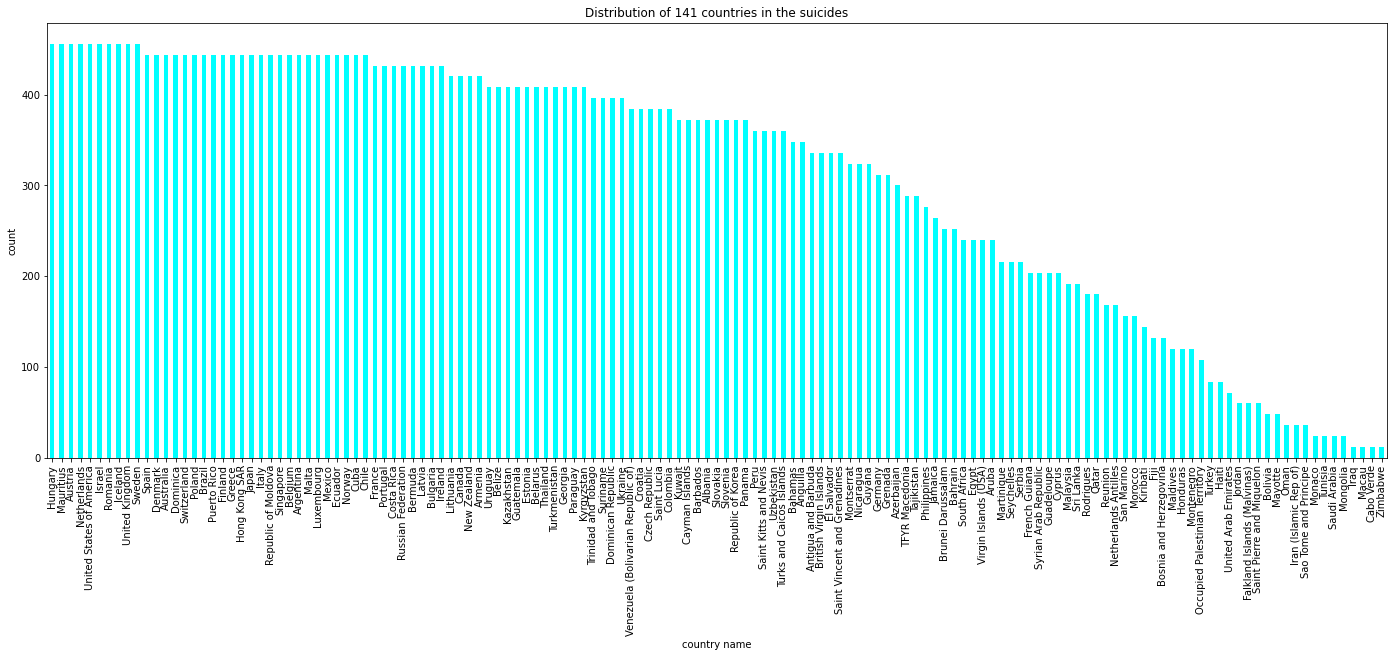

In [13]:
#visualising the different countries distribution in the datasets
data['country'].value_counts(normalize=True)
data['country'].value_counts(dropna=False).plot.bar(color='cyan',figsize=(24,8))

plt.title('Distribution of 141 countries in the suicides')
plt.xlabel('country name')
plt.ylabel('count')
plt.show()

In [14]:
data['year'].value_counts().count()

38

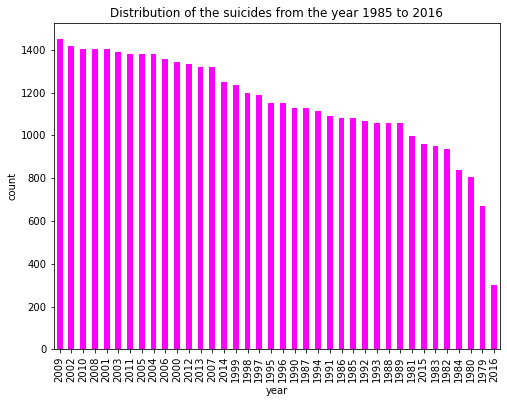

In [15]:
#Visualising the different year distribution in the datasets
data['year'].value_counts(normalize=True)
data['year'].value_counts(dropna=False,).plot.bar(color='magenta',figsize=(8,6))

plt.title('Distribution of the suicides from the year 1985 to 2016')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

In [16]:
#label encoding for gender 
from sklearn.preprocessing import LabelEncoder

#creating an encoder
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['gender'].value_counts()

0    21888
1    21888
Name: gender, dtype: int64

In [17]:
#Replacing categorical values in the age column 
data['age']=data['age'].replace('5-14 years',0)
data['age']=data['age'].replace('15-24 years',1)
data['age']=data['age'].replace('25-34 years',2)
data['age']=data['age'].replace('35-54 years',3)
data['age']=data['age'].replace('55-74 years',4)
data['age']=data['age'].replace('75+ years',5)

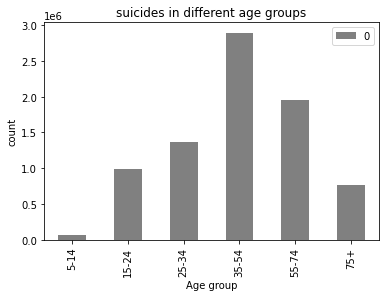

In [18]:
#Suicides in different age groups
x1=data[data['age']==0]['suicides'].sum()
x2=data[data['age']==1]['suicides'].sum()
x3=data[data['age']==2]['suicides'].sum()
x4=data[data['age']==3]['suicides'].sum()
x5=data[data['age']==4]['suicides'].sum()
x6=data[data['age']==5]['suicides'].sum()

x=pd.DataFrame([x1,x2,x3,x4,x5,x6])
x.index=['5-14','15-24','25-34','35-54','55-74','75+']
x.plot(kind='bar',color='grey')

plt.title('suicides in different age groups')
plt.xlabel('Age group')
plt.ylabel('count')
plt.show()

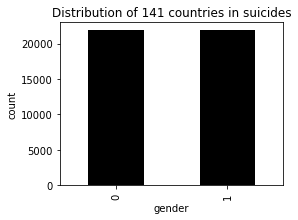

In [19]:
#Visiualsing the gender distribution in then datasets
data['gender'].value_counts(normalize=True)
data['gender'].value_counts(dropna=False).plot.bar(color='black',figsize=(4,3))

plt.title('Distribution of 141 countries in suicides')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [20]:
#total populations of 141 countries over which the suicides survey is committed
data['population'].sum()

63761315943.0

In [21]:
#Avrage population
Avg_pop=data['population'].mean()
print(Avg_pop)

1664091.1353742562


In [22]:
#Total numbers of suicides commited in the 141 countries from 1985 to 2016
data['suicides'].sum()

8026455.0

In [23]:
#Avrage suicides in the world
Avg_sui=data['suicides'].mean()
print(Avg_sui)

193.3153901734104


In [25]:
#imputing tha NAN values from the populatoion column
data['population']=data['population'].fillna(data['population'].median())
data['population'].isnull().any()

False

In [27]:
#imputing the values suicides no column
data['suicides']=data['suicides'].fillna(0)
data['suicides'].isnull().any()

False

In [28]:
#rearranging the columns
data=data[['country','year','gender','age','population','suicides']]
data.head(0)

,country,year,gender,age,population,suicides


In [30]:
#Removing the country column
data=data.drop(['country'],axis=1)
data.head(0)

,year,gender,age,population,suicides


In [32]:
#splitting the data into dependent and independent variables
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)


In [33]:
#splitting the dataset into tranning and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32832, 4)
(32832,)
(10944, 4)
(10944,)


In [34]:
#min max scalling
#importing the min max scale
from sklearn.preprocessing import MinMaxScaler
#creating a scaler
mm=MinMaxScaler()
#scalling the independent variables
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

In [35]:
#using principle component analysis
from sklearn.decomposition import PCA
#creating a principal component anylisis model
#x_train=pca.fit_transform(x_train)
#x_test=pca.transform(x_test)
 #visualising the principal component  that will higest share of exprerince
#explained_varience=pca.explained_varience_ratio_
#print(explained_varience)
#creating the principal component analysis model
#pca=pca(n_components=1)
#feeding the independdent variablesbs to the PCA model
#x_train=pca.fit_transform(x_train)
#x_test=pca.transform(x_test)

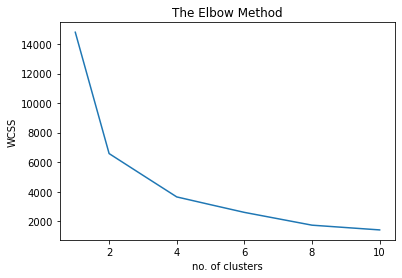

In [37]:
# applying k means clustering

# selecting the best choice for no. of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x_train)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

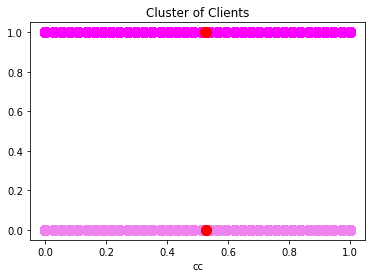

In [38]:
# applying kmeans with 4 clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x_train)

# visualising the clusters

plt.scatter(x_train[y_means == 0, 0], x_train[y_means == 0, 1], s = 100, c = 'pink', label = 'cluster 1')
plt.scatter(x_train[y_means == 1, 0], x_train[y_means == 1, 1], s = 100, c = 'cyan', label = 'cluster 2')
plt.scatter(x_train[y_means == 2, 0], x_train[y_means == 2, 1], s = 100, c = 'magenta', label = 'cluster 3')
plt.scatter(x_train[y_means == 3, 0], x_train[y_means == 3, 1], s = 100, c = 'violet', label = 'cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'centroids')

plt.title('Cluster of Clients')
plt.xlabel('cc')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 356895.26574870344
RMSE : 597.4071189303852
r2_score : 0.3911230760802389


In [40]:
from sklearn.svm import SVR
#creating the model 
model=SVR()

#feeding the training data into the model
model.fit(x_train,y_train)

#predicting the test set result
y_pred=model.predict(x_test)

#calculating the mean squared error
mse=np.mean((y_test-y_pred)**2)
print("MSE:",mse)

#calculating the root mean squared erroe
rmse=np.sqrt(mse)
print("RMSE:",rmse)

#calculating the r2 score
r2=r2_score(y_test,y_pred)
print("r2_score:",r2)


MSE: 561498.366917432
RMSE: 749.3319470818204
r2_score: 0.04206238847846855


In [43]:
from sklearn.ensemble import RandomForestRegressor

#creating the model
model=RandomForestRegressor()

#feeding the training data into the model
model.fit(x_train,y_train)

#predecting the set test set results
y_pred=model.predict(x_test)

#calculating the mean squares error
mse=np.mean((y_test-y_pred)**2)
print("MSE:",mse)

#calculating the root mean squared error
rmse=np.sqrt(mse)
print("RMSE:",rmse)

#calculating the r2 score
r2=r2_score(y_test,y_pred)
print("r2_score:",r2)

MSE: 84816.98167225037
RMSE: 291.2335517625852
r2_score: 0.8552989970645304


In [46]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 152262.54765373006
RMSE : 390.2083387803624
r2_score : 0.7402342912868236


In [47]:
from sklearn.ensemble import AdaBoostRegressor

# creating the model
model = AdaBoostRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 248772.79888597105
RMSE : 498.77128915563196
r2_score : 0.5755841248752855


In [ ]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = 100, max_iter = 50 )

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

C:\Users\91983\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
